In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [3]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


Outliers for Sehwag

In [4]:
p_25 = np.percentile(sehwag["Runs"], 25)
print(p_25)

8.0


In [5]:
p_50 = np.percentile(sehwag["Runs"], 50)
print(p_50)

23.0


In [6]:
p_75 = np.percentile(sehwag["Runs"], 75)
print(p_75)

46.0


In [7]:
iqr = p_75 - p_25
print(iqr)

38.0


In [8]:
left = p_25 - 1.5*iqr
print("Left: ", left)

left = 0

Left:  -49.0


In [9]:
right = p_75 + 1.5*iqr
print("Right: ", right)

Right:  103.0


<IPython.core.display.Javascript object>


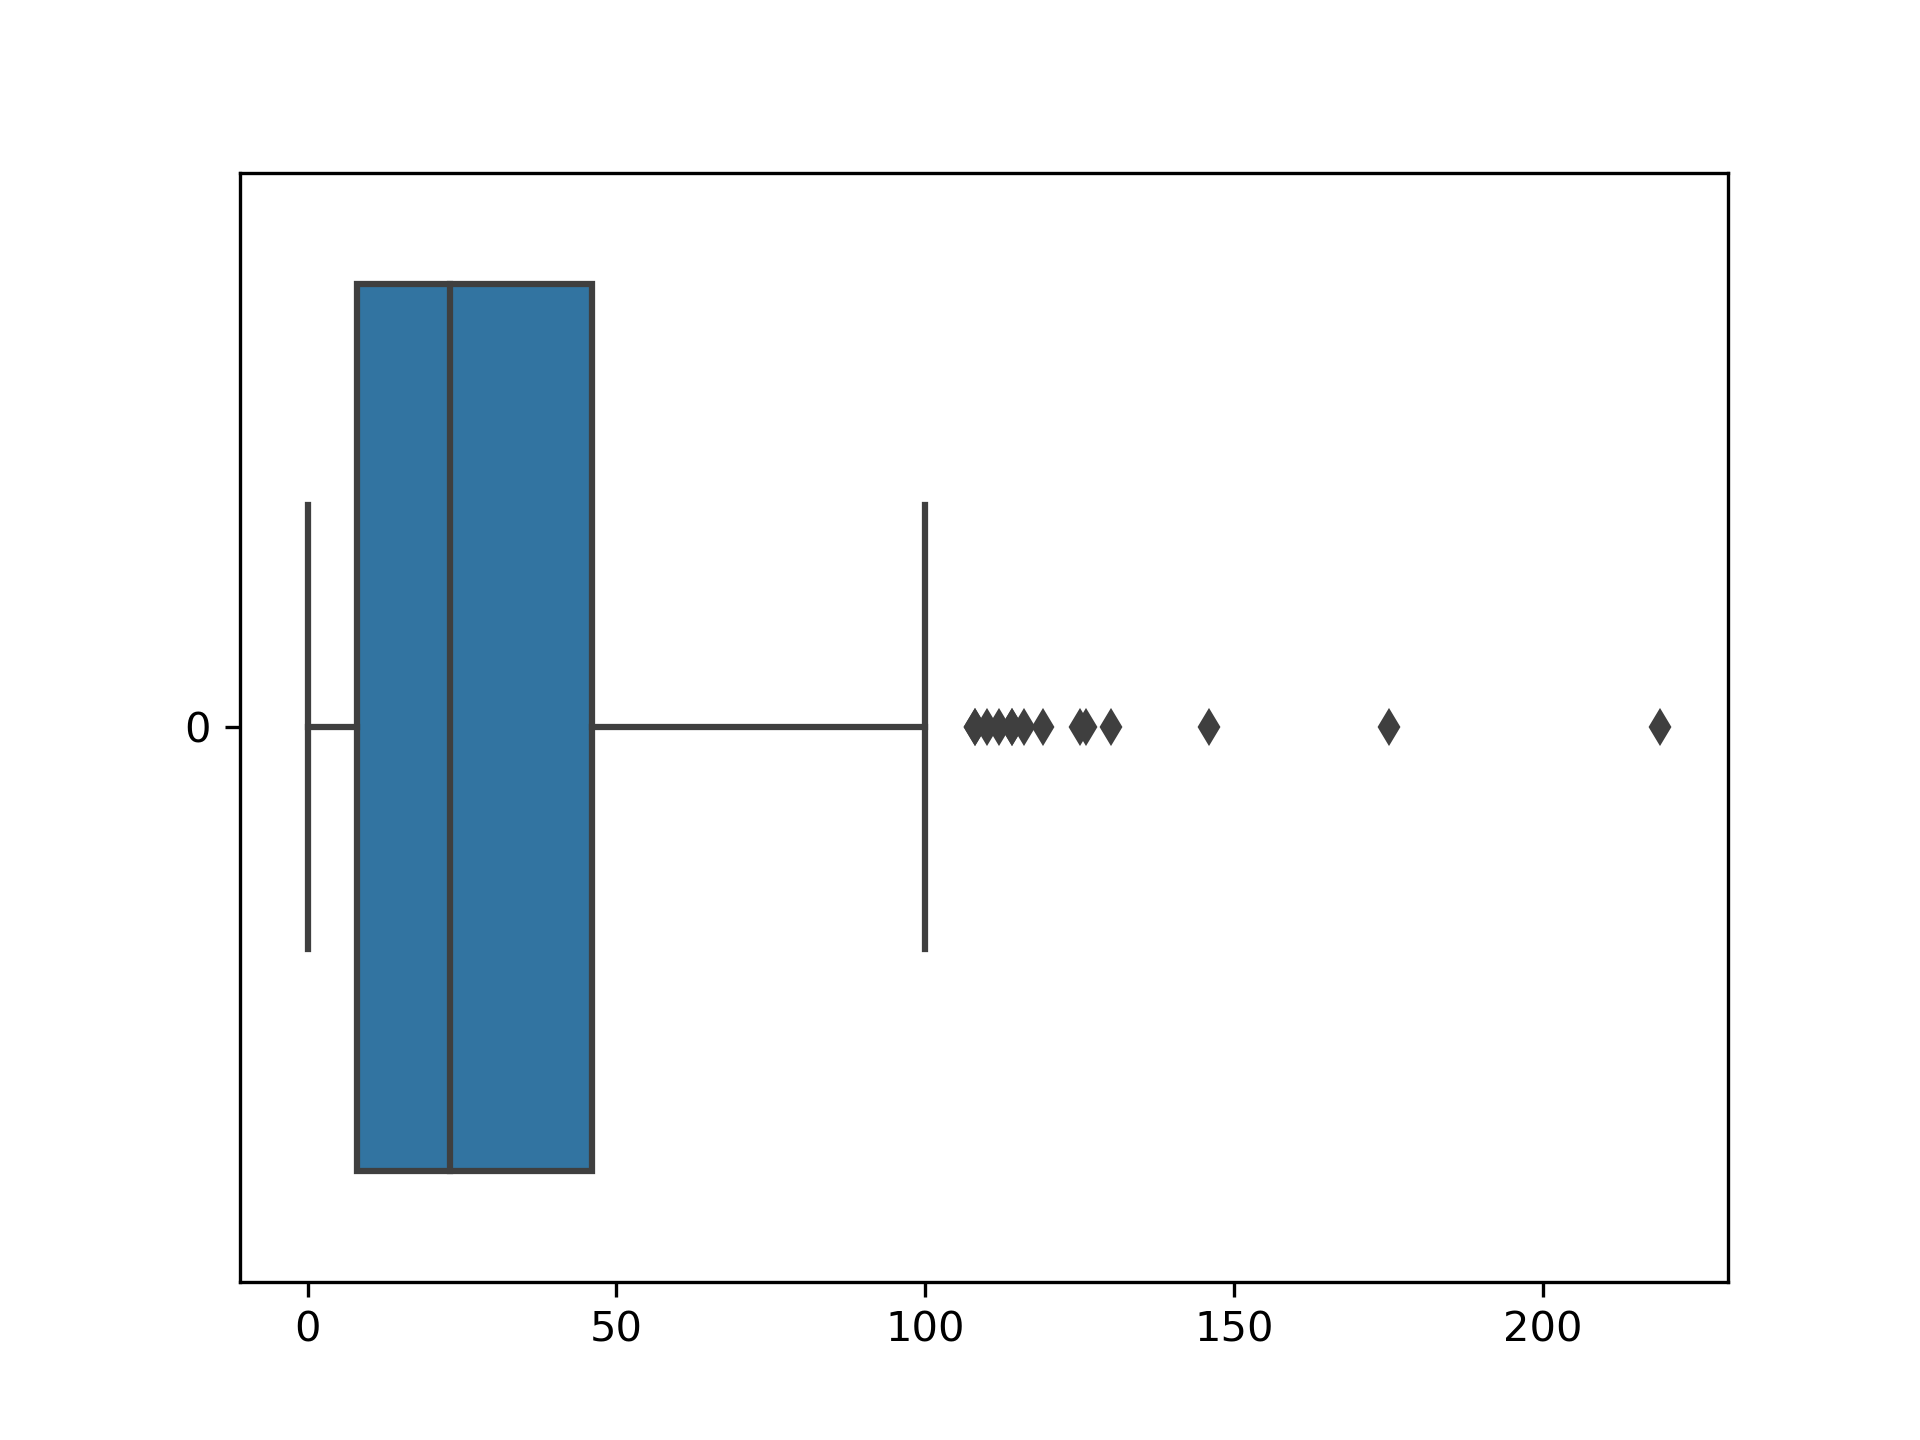

<AxesSubplot:>

In [24]:
plt.figure()
sns.boxplot(data=sehwag["Runs"], orient="h")

In [11]:
len(sehwag)

245

In [12]:
sehwag_outliers = len(sehwag[sehwag["Runs"] > right])
print(sehwag_outliers)

14


Analysis for Rahul Dravid

In [13]:
p_25 = dravid["Runs"].quantile(0.25) # Q1 or p_25
p_50 = dravid["Runs"].quantile(0.5)  # Q2 or p_50 or median
p_75 = dravid["Runs"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [14]:
iqr = p_75 - p_25 
left = max(p_25 - 1.5*iqr, 0)
right = p_75 + 1.5*iqr
print(left, right)
print(iqr)

0 120.0
44.0


In [15]:
dravid_outliers = len(dravid[dravid["Runs"] > right])
print(dravid_outliers)

3


In [16]:
box_plot = sns.boxplot(data=dravid["Runs"], orient="h")
median = np.median(dravid["Runs"])
offset = median * 0.05
for xtick in box_plot.get_xticks():
    box_plot.text(median, 0.25, median)

<IPython.core.display.Javascript object>


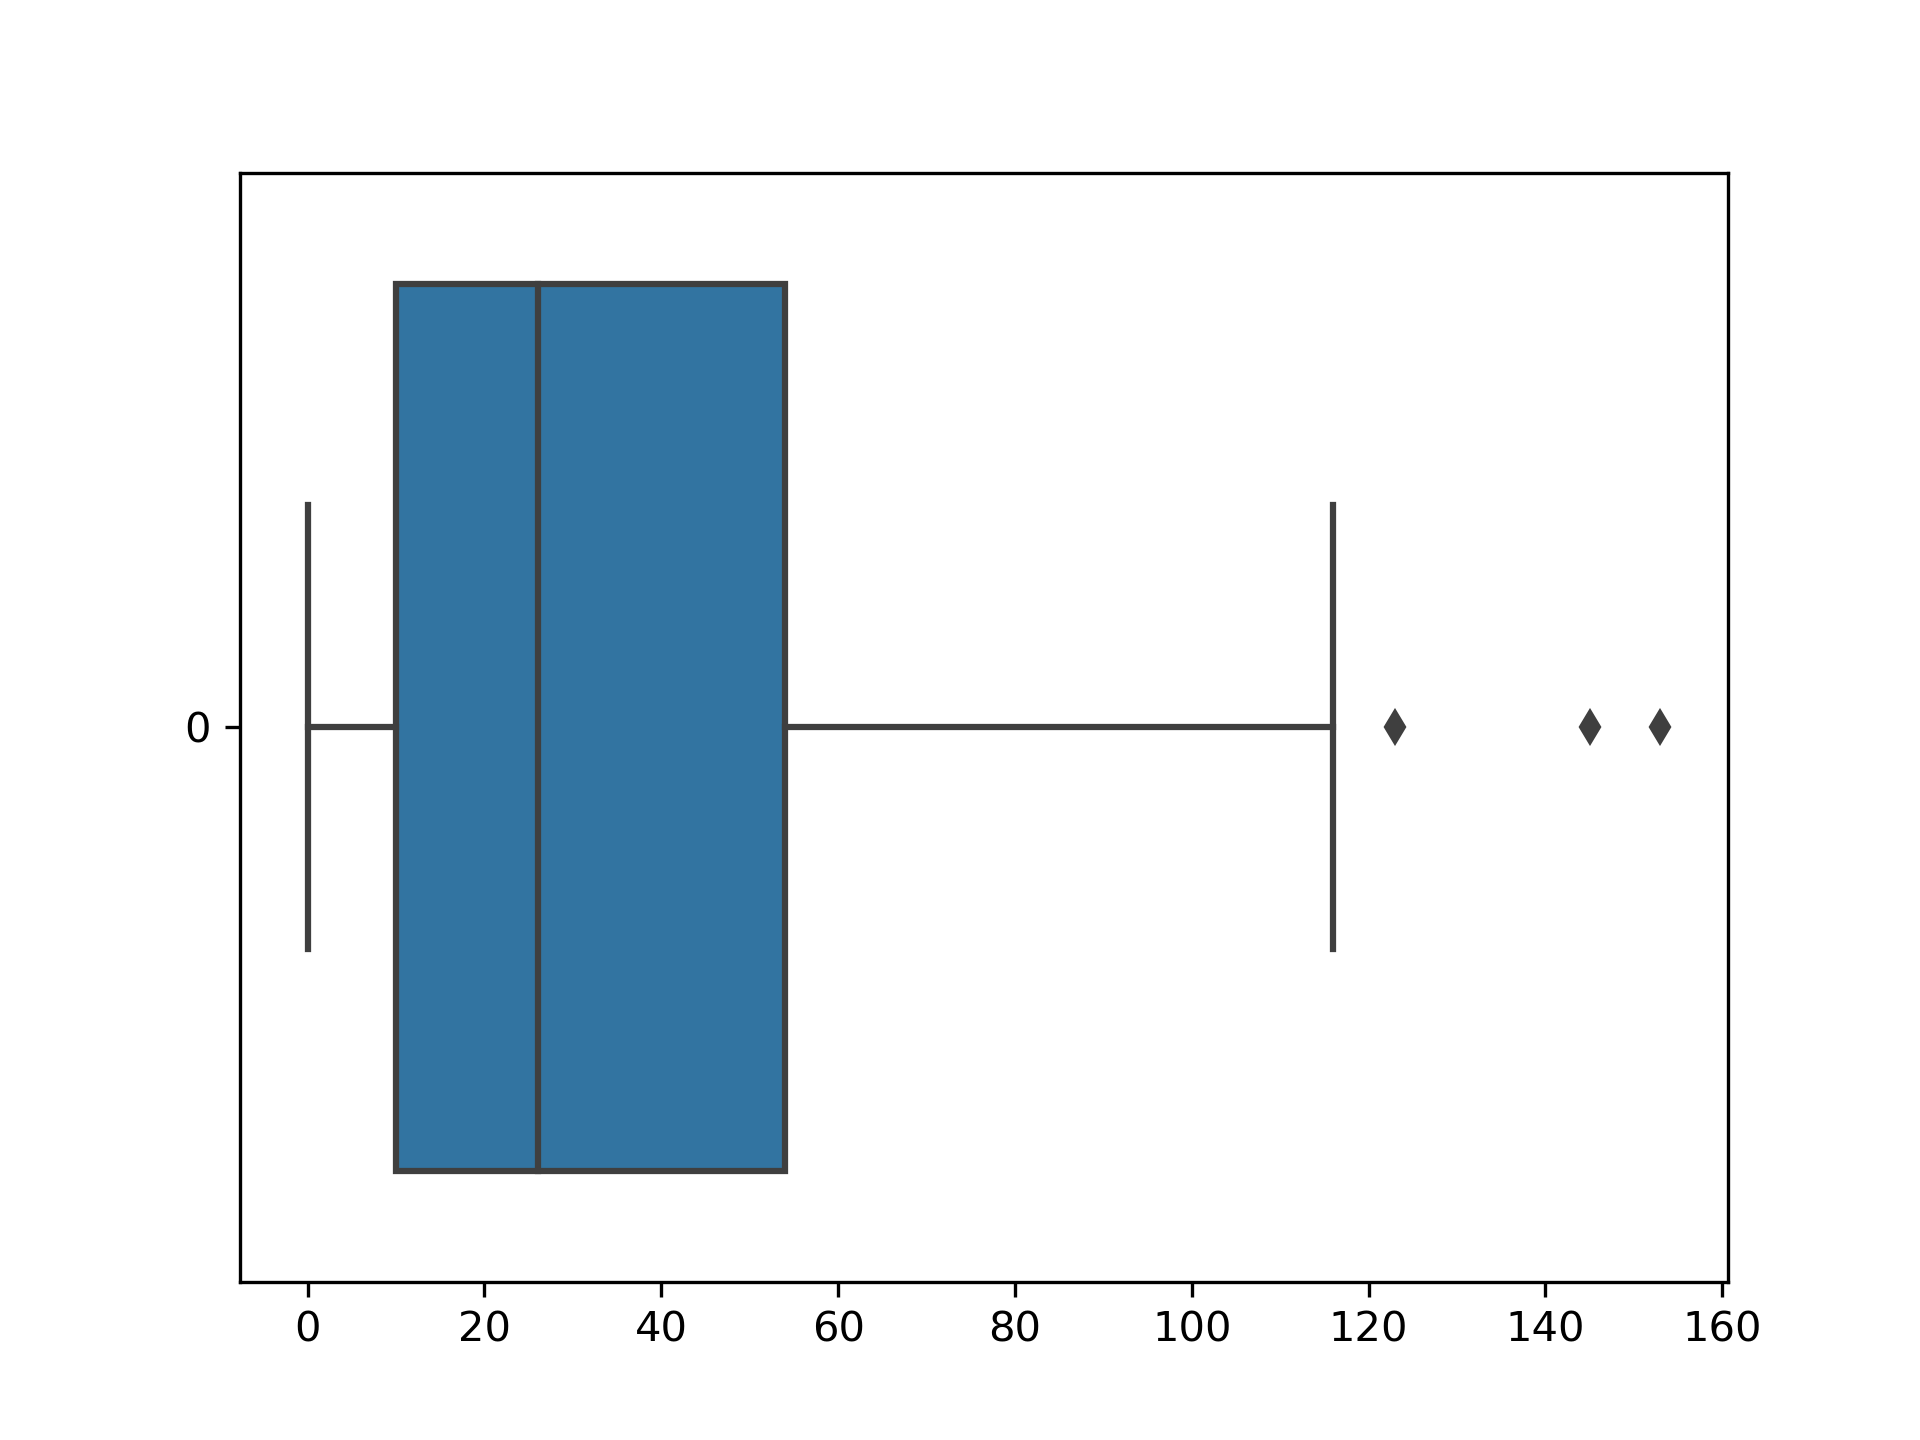

In [25]:
plt.figure()
box_plot = sns.boxplot(data=dravid["Runs"], orient="h")

In [18]:
data = np.array([1,2,3,4])
np.percentile(data,25)

1.75

In [19]:
np.info(np.percentile)

 percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear',
            keepdims=False, *, interpolation=None)

Compute the q-th percentile of the data along the specified axis.

Returns the q-th percentile(s) of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Percentile or sequence of percentiles to compute, which must be between
    0 and 100 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the percentiles are computed. The
    default is to compute the percentile(s) along a flattened
    version of the array.

    .. versionchanged:: 1.9.0
        A tuple of axes is supported
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : bool, optional
    If True,

In [20]:
a = np.array([30,32,35,35,38])
np.percentile(a, 25)

32.0

In [21]:
a = pd.read_html("https://www.espncricinfo.com/player/rahul-dravid-28114/bowling-batting-stats")

In [22]:
a[2]

,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,vs Australia,1996-2012,33,62,6,2166,233,38.67,5506,39.33,2,13,4,269,4
1,vs Bangladesh,2000-2010,7,10,2,560,160,70.00,942,59.44,3,1,1,76,2
2,vs England,1996-2011,21,37,5,1950,217,60.93,4715,41.35,7,8,1,253,0
3,vs New Zealand,1998-2010,15,28,2,1659,222,63.80,3668,45.22,6,6,1,223,2
4,vs Pakistan,1999-2007,15,26,3,1236,270,53.73,2732,45.24,5,3,1,162,3
5,vs South Africa,1996-2011,21,40,3,1252,148,33.83,3591,34.86,2,5,0,164,0
6,vs Sri Lanka,1997-2010,20,32,1,1508,177,48.64,3245,46.47,3,9,0,176,4
7,vs West Indies,1997-2011,23,38,7,1978,146,63.80,4878,40.54,5,13,0,205,5
8,vs Zimbabwe,1998-2005,9,13,3,979,200*,97.90,1981,49.41,3,5,0,126,1


In [23]:
np.info(sns.boxplot)

 boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None,
         orient=None, color=None, palette=None, saturation=0.75, width=0.8,
         dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None,
         **kwargs)

Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  var